### Info 
MMO lab-1
IU5-21M, Denis Vasilev

### Task
- Выбрать набор данных (датасет).

- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

- Сформировать отчёт

### 0. Импорт библиотек и загрузка датасета

Для выполнения лабораторной работы был выбран набор данных о методах школьного обучения

Источник: https://healthdata.gov/National/School-Learning-Modalities-2020-2021/a8v3-a3m3

In [72]:
import plotly.express as px
from plotly import graph_objects

import seaborn as sns

import pandas as pd
pd.set_option('mode.chained_assignment', None)

In [73]:
ds = pd.read_csv('school_learning_modalities.csv')

In [74]:
ds.head()

,district_nces_id,district_name,week,learning_modality,operational_schools,student_count,city,state,zip_code
0,100005,Albertville City,05/30/2021 12:00:00 AM,In Person,6,5824.0,Albertville,AL,35950
1,100006,Marshall County,05/30/2021 12:00:00 AM,Hybrid,15,5764.0,Guntersville,AL,35976
2,100007,Hoover City,05/30/2021 12:00:00 AM,In Person,18,14061.0,Hoover,AL,35243
3,100008,Madison City,05/30/2021 12:00:00 AM,In Person,11,11695.0,Madison,AL,35758
4,100011,Leeds City,05/30/2021 12:00:00 AM,In Person,4,2076.0,Leeds,AL,35094


### 1. Количество учеников каждой формы обучения

In [75]:
data1 = ds[['learning_modality', 'student_count']].groupby('learning_modality').sum()

px.pie(None, data1.index.values, data1['student_count'])

### 2. Количество школ по штатам

In [76]:
data2 = ds[['state', 'operational_schools']].groupby('state').agg({'operational_schools': ['mean']})

fig = px.histogram(data2['operational_schools'], x=data2['operational_schools'].index, y="mean")
fig.show()

### 3. Колебания в количестве учеников по времени

In [77]:
data3 = ds[['week', 'student_count']].groupby('week').sum()

print(data3['student_count'].values)

fig = px.line(x=data3.index, y=data3['student_count'].values)
fig.show()

[45053811. 45651014. 45693974. 45754220. 45813572. 45862206. 45804462.
 45961883. 46007364. 46097763. 46154007. 46152157. 46159368. 46291323.
 46327408. 46421763. 46458839. 46447218. 46499140. 46478701. 46292124.
 46228713. 45554157. 45708316. 45608170. 45288085. 44664300. 45817045.
 45725419. 45126595. 45691856. 45422631. 45784334. 45675450. 44953787.
 45257596. 45534139. 45750626. 45246316.]


### 4. Heatmap

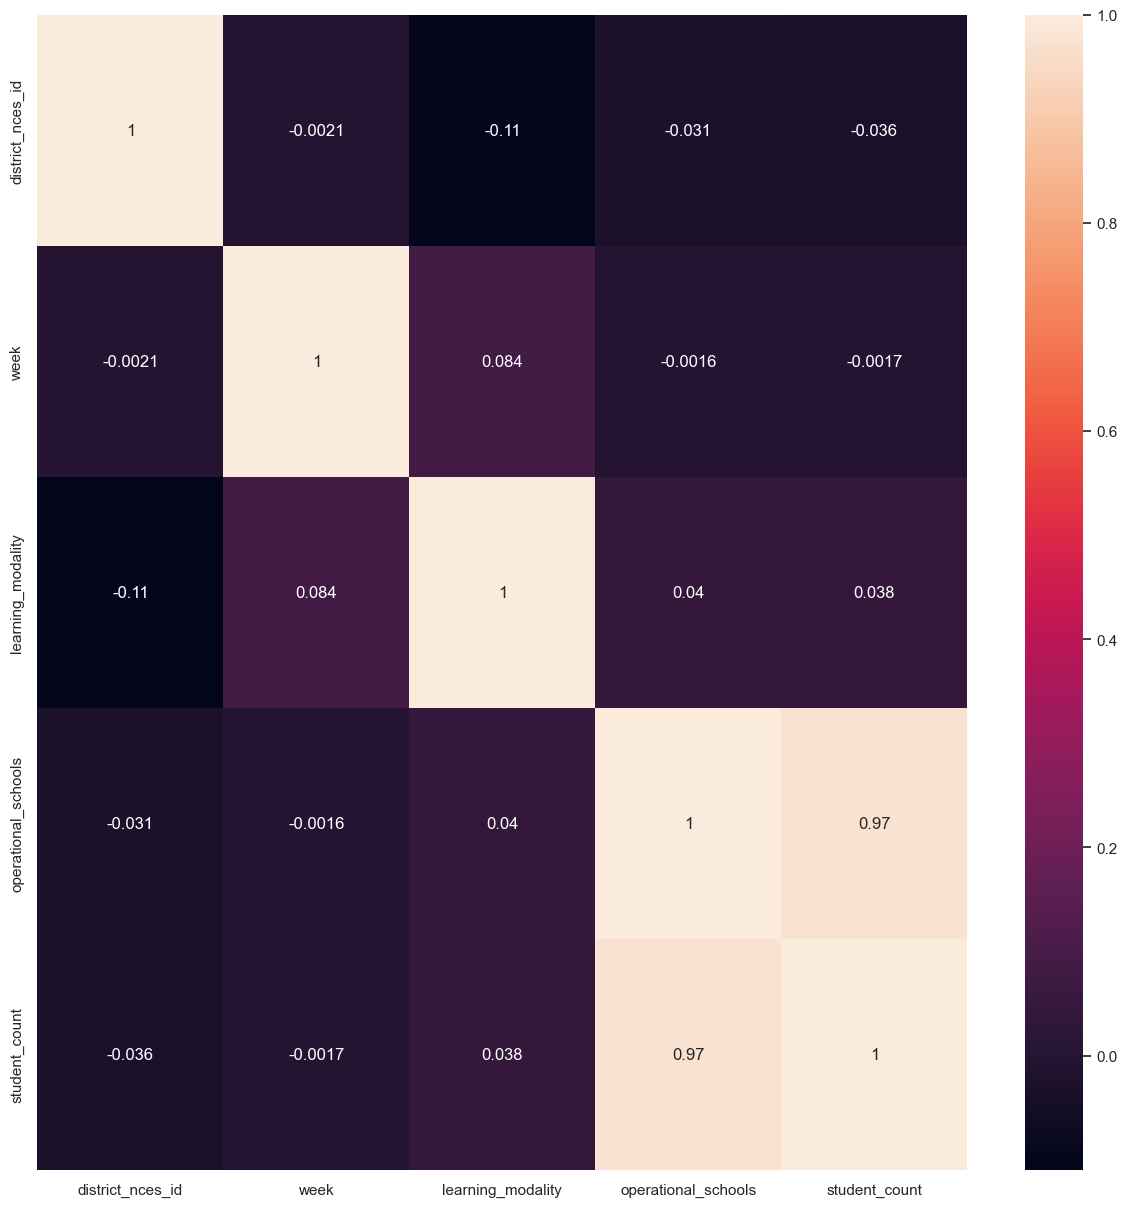

In [78]:
data4 = ds[['district_nces_id', 'week', 'learning_modality', 'operational_schools', 'student_count']]

data4['week'] = data4['week'].astype('category')
data4['week'] = data4['week'].cat.codes

data4['learning_modality'] = data4['learning_modality'].astype('category')
data4['learning_modality'] = data4['learning_modality'].cat.codes

corr_matrix = data4.corr()
sns.heatmap(corr_matrix, annot=True)
sns.set(rc = {'figure.figsize':(15,15)})

### 5. Boxplot

In [79]:
data5 = ds[['learning_modality', 'week', 'student_count']].groupby(['learning_modality', 'week']).sum()

print(data5)

print(data5.index.get_level_values(0))

fig = px.box(data5, x=data5.index.get_level_values(0), y=data5['student_count'])
fig.show()

                                          student_count
learning_modality week                                 
Hybrid            01/03/2021 12:00:00 AM     16553798.0
                  01/10/2021 12:00:00 AM     18913274.0
                  01/17/2021 12:00:00 AM     20267957.0
                  01/24/2021 12:00:00 AM     20484469.0
                  01/31/2021 12:00:00 AM     21836212.0
...                                                 ...
Remote            11/29/2020 12:00:00 AM     16718527.0
                  12/06/2020 12:00:00 AM     16874232.0
                  12/13/2020 12:00:00 AM     18028098.0
                  12/20/2020 12:00:00 AM     18434978.0
                  12/27/2020 12:00:00 AM     18339863.0

[117 rows x 1 columns]
Index(['Hybrid', 'Hybrid', 'Hybrid', 'Hybrid', 'Hybrid', 'Hybrid', 'Hybrid',
       'Hybrid', 'Hybrid', 'Hybrid',
       ...
       'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote',
       'Remote', 'Remote', 'Remote'],
      dt